<h3 style="text-align: center;">ESCUELA TÉCNICA SUPERIOR DE INGENIERÍA INFORMÁTICA</h3>
<h3 style="text-align: center;">UNIVERSIDAD DE SEVILLA</h3>
<h3 style="text-align: center;">MATEMÁTICA APLICADA A SISTEMAS DE INFORMACIÓN</h3>
<h3>Primera práctica de laboratorio</h3>
<p>En esta práctica estudiaremos métodos de optimización sin restricciones de funciones de una variable. Aunque nos centramos en el caso de encontar el mínimo de una función dada, todo lo que se comenta es fácilmente adaptable al caso de localizar eventualmente el máximo de una función $h(x)$ (en particular, basta estudiar el mínimo de la función opuesta, $-h(x)$). Es decir partimos del problema:</p>
<p>$$\min _{x\in[a,b]}f(x)$$</p>
<p>Gracias al teorema de Weierstrass sabemos que en un conjunto $D$ cerrado y acotado siempre se alcanza el máximo y el mínimo. Hemos estudiado métodos analíticos que nos permiten calcular dichos óptimos. En esta práctica nos centraremos en los métodos numéricos para la resolución de dichos problemas de optimización de funciones de una variable.</p>
<p>Supongamos que estamos interesados en calcular el mínimo de la función:</p>
<p>$$f(x)=x^2+e^x$$</p>
<p>en el intervalo $x\in[-1,3]$</p>

In [ ]:
f(x)=x^2+exp(x)

<p>En la gráfica podemos apreciar cómo la función es unimodal en el intervalo $[-1,3]$:</p>

In [ ]:
plot(f(x),(x,-1,3))

<h3>Método de la sección aúrea</h3>
<p>Si comenzamos a aplicar el método de la sección aúrea en nuestro intervalo $[-1,3]$, inicialmente:</p>
<p>$$a=-1, \,b=3,\, c=a+(1-r)(b-a),\, d=a+r(b-a),$$</p>
<p>con</p>
<p>$$r=\frac{\sqrt{5}-1}{2}$$</p>
<p>por tanto:</p>

In [ ]:
a=-1;b=3;r=(sqrt(5)-1)/2;c=a+(1-r)*(b-a);d=a+r*(b-a);
print('a=',a,'; b=',b,'; c=',c,'; d=',d)

<p>Ahora tenemos que comprobar si $f(c)\leq f(d)$,</p>

In [ ]:
f(c).n();f(d).n()

<p>Como estamos en ese caso, tenemos que cambiar $b=d$, $d=c$ y calcular un nuevo $c$.</p>

In [ ]:
b=d;d=c;c=a+(1-r)*(b-a);
print('a=',a,'; b=',b,'; c=',c,'; d=',d)

In [ ]:
print('a=',a.n(),'; b=',b.n(),'; c=',c.n(),'; d=',d.n())

<p>El criterio de parada dependerá de la cota de error que estemos considerando, en esta primera iteración, tenemos que $l_2=r(b-a)$ donde $a$ y $b$ son los valores iniciales.</p>

In [ ]:
(b-a).n()

<p>Si queremos poder asegurar dos cifras decimales exactas, podemos escribir el algoritmo:</p>

In [ ]:
error=10^(-2)

In [ ]:
a=-1;b=3;r=(sqrt(5)-1)/2;c=a+(1-r)*(b-a);d=a+r*(b-a);l=b-a;k=1;
while l>=error:
    if f(c)<f(d):
        b=d;d=c;c=a+(1-r)*(b-a);l=b-a;
        print('iter:', k, '; a=',a.n(), '; b=',b.n())
    else:
        a=c;c=d;d=a+r*(b-a);l=b-a;
        print('iter:', k, '; a=',a.n(), '; b=',b.n())
    k=k+1

<h3>Método de Newton</h3>
<p>Si para este mismo problema hubiéramos usado el método de Newton, comenzando en $x_0=3$</p>

In [ ]:
f(x)=x^2+exp(x)

In [ ]:
fx=diff(f(x),x);fx2=diff(f(x),x,2);x0=3;iteraciones=8;
for i in range(iteraciones):
    x0=x0-fx(x=x0)/fx2(x=x0);
    print('iter',i+1,'; x0=',x0.n())

<p>Para poder aplicar el método de Newton necesitamos que se verifiquen las condiciones de Fourier. En la siguiente gráfica vemos cómo ni $f''(x)$ ni $f^{(3)}(x)$ se anulan en $[-1,3]$, además</p>
<p>$$f'(3)f^{(3)}(3)>0$$</p>
<p>por lo que la elección del punto de inicio ha sido la adecuada.</p>

In [ ]:
fx3=f.diff(x,3)
plot(fx,(x,-1,3))+plot(fx2,(x,-1,3),color='red')+plot(fx3,(x,-1,3),color='green')

<p>Se aprecia la convergencia mucho más rápida de este método, como estamos buscando solución de la ecuación $f'(x)=0$, usando el método de parada dado por</p>
<p>$$ \epsilon_n\leq \frac{|f'(x)|}{\min \limits _{x\in[a,b]|f''(x)|}},$$</p>
<p>tendríamos que calcular una cota del valor absoluto de la segunda derivada de $f(x)$</p>

In [ ]:
plot(fx2,(x,-1,3))


In [ ]:
minder2=fx2(x=-1)

In [ ]:
i=1;x0=3;eps=abs(fx(x=3))/minder2;
while eps>=error:
    x0=x0-fx(x=x0)/fx2(x=x0);
    eps=abs(fx(x=x0))/minder2;
    print('iter',i,'; x0=', x0.n(),'; error=', eps.n())
    i=i+1;

<h3>Método de interpolación cuadrático</h3>
<p>Como hemos visto en clase este método aproxima la función que queremos optimar mediante una parábola. Si consideramos el mismo ejemplo:</p>
<p>$$f(x)=x^2+e^x$$</p>
<p>por tanto si partimos de una terna $\{x_1,x_2,x_3\}$, con $x_1<x_2<x_3$ con $f(x_2)\leq f(x_1)$ y $f(x_2)\leq f(x_3)$,</p>
<p>podemos considerar en nuestro ejemplo $x_1=-1$ $x_2=1$ $x_3=3$,</p>
<p>la fórmula general del vértice de la parábola que pasa por $\{(x_1,f_1), (x_2,f_2),(x_3,f_3)\}$, es</p>
<p>$$\widehat{x}=\frac{1}{2}\frac{(x_2^2-x_3^2)f_1+(x_3^2-x_1^2)f_2+(x_1^2-x_2^2)f_3}{(x_2-x_3)f_1+(x_3-x_1)f_2+(x_1-x_2)f_3}$$</p>

In [ ]:
f(x)=x^2+exp(x)

In [ ]:
x1=-1;x2=1;x3=3;f1=f(x1);f2=f(x2);f3=f(x3)
x4=1/2*((x2^2-x3^2)*f1+(x3^2-x1^2)*f2+(x1^2-x2^2)*f3)/((x2-x3)*f1+(x3-x1)*f2+(x1-x2)*f3);f4=f(x4)

In [ ]:
x4.n()

<p>Por tanto $x_1<\widehat x< x_2$, tenemos ahora que comparar las imágenes de $x_2$ y $\widehat x$ mediante $f$, para descartar uno de los extremos del intervalo, $x_1$ ó $x_3$:</p>

In [ ]:
print('f(x1)=',f1.n(),'; f(x4)=',f4.n(),'; f(x2)=',f(x2).n())

<p>Así en la siguiente iteración, consideraríamos el conjunto de puntos $\{x_1,\widehat{x},x_2\}$. Hemos descartado el extremo $x_3$.</p>
<p>Podemos utilizar el criterio de parada $|\widehat{x}_{k}-\widehat{x}_{k-1}|\leq \epsilon$, para ello necesitamos al menos dos iteraciones o poner de inicio $\widehat{x}_0=10^{99}$, entendiendo que es un valor muy lejano al mínimo que queremos aproximar</p>

In [ ]:
x3=x2;x2=x4;xk=x4;f3=f2;f2=f4;
x4=1/2*((x2^2-x3^2)*f1+(x3^2-x1^2)*f2+(x1^2-x2^2)*f3)/((x2-x3)*f1+(x3-x1)*f2+(x1-x2)*f3);f4=f(x4)

In [ ]:
x4.n();x2.n()

In [ ]:
abs(x4-xk).n()

<p>Usando dos iteraciones de la interpolación cuadrática no hemos conseguido ninguna cifra decimal exacta.</p>

In [ ]:
print('f(x1)=',f1.n(),'; f(x4)=',f4.n(),'; f(x2)=',f(x2).n())

<p>Por lo tanto de nuevo descartamos $x_3$, la nueva terna sería $\{x_1,\widehat{x},x_2\}$, de esta forma si el criterio de parada fuese $|\widehat{x}_k-\widehat{x}_{k-1}|<10^{-2}$ tendriamos que seguir iterando:</p>

In [ ]:
x3=x2;x2=x4;xk=x4;f3=f2;f2=f4
x4=1/2*((x2^2-x3^2)*f1+(x3^2-x1^2)*f2+(x1^2-x2^2)*f3)/((x2-x3)*f1+(x3-x1)*f2+(x1-x2)*f3);f4=f(x4)

In [ ]:
x4.n();x2.n()

In [ ]:
abs(xk-x4).n()

<p>No se ha alcanzado el criterio de parada, por lo que seguimos iterando</p>

In [ ]:
print('f(x1)=',f1.n(),'; f(x2)=',f2.n(),'; f(x4)=',f(x4).n())

<p>Ahora descartamos $x_1$ y seguimos iterando</p>

In [ ]:
xk=x4;x1=x2;x2=x4;f1=f2;f2=f4;
x4=1/2*((x2^2-x3^2)*f1+(x3^2-x1^2)*f2+(x1^2-x2^2)*f3)/((x2-x3)*f1+(x3-x1)*f2+(x1-x2)*f3);f4=f(x4)

In [ ]:
abs(xk-x4).n()

In [ ]:
x4.n()

<p>Ya hemos obtenido la precisión requerida, mediante cuatro iteraciones del método de interpolación cuadrática.</p>
<h3>Interpolación cúbica</h3>
<p>Ahora vamos a interpolar mediante un polinomio de grado 3, lo que se conoce como interpolación cúbica. El teorema de interpolación nos dice que necesitamos conocer cuatro puntos por donde pase nuestro polinomio, o dos donde conozcamos cúanto vale $f(x_i)$ y también $f'(x_i)$.</p>
<p>Si partimos de un intervalo donde la función es unimodal, el signo de la derivada será $f'(x_1)<0$ y $f'(x_2)>0$. Supongamos por tanto, que tenemos un intervalo $[x_1,x_2]$ donde la función es unimodal, y conocidos: $f_1=f(x_1)$, $f'_1=f'(x_1)$, $f_2=f(x_2)$, $f'_2=f'(x_2)$.</p>
<p>En ese caso el mínimo del polinomio cúbico interpolador es:</p>
<p>$$\widehat{x}=x_2-\left(\frac{f'_2+w-z}{f'_2-f_1'+2w}\right)(x_2-x_1)$$</p>
<p>donde</p>
<p>$$z=\frac{3(f_1-f_2)}{x_2-x_1}+f'_1+f'_2\qquad w=\sqrt{z^2-f'_1f'_2}$$</p>
<p>Una vez que conozcamos el mínimo procedemos a eliminar uno de los dos extremos, desechando aquél donde el signo de la derivada coincida con el signo de la derivada en $\widehat{x}$.</p>
<p>Como en el caso de interpolación cuadrática, usaremos el criterio de parada, $|\widehat{x}_{k+1}-\widehat{x}_k|<\epsilon$</p>
<p>Usaremos el mismo ejemplo</p>
<p>$$f(x)=x^2+e^x$$</p>
<p>en el intervalo $[-1,3]$:</p>

In [49]:
f(x)=x^2+exp(x);fx=f.diff()

In [50]:
x1=-1.;x2=3.;f1=f(x1);f2=f(x2);fp1=fx(x1);fp2=fx(x2); xk=10^(99);k=1;
z=3*(f1-f2)/(x2-x1)+fp1+fp2;w=sqrt(z^2-fp1*fp2);
x3=x2-(fp2+w-z)/(fp2-fp1+2*w)*(x2-x1);f3=f(x3);fp3=fx(x3);

In [51]:
x3.n();fp3.n()

1.61402290502583

<p>Como $f'(x_3)>0$ y suponemos que nuestra función es unimodal en el intervalo dado, descartaríamos el extremo $x_2$ y volveríamos a iterar:</p>

In [52]:
xk=x3;x2=x3;f2=f3;fp2=fp3;
z=3*(f1-f2)/(x2-x1)+fp1+fp2;w=sqrt(z^2-fp1*fp2);
x3=x2-(fp2+w-z)/(fp2-fp1+2*w)*(x2-x1);f3=f(x3);fp3=fx(x3);

In [53]:
abs(xk-x3).n()

0.549915281866460

<p>Si tuviésemos la condicion $|\widehat{x}_k-\widehat{x}_{k-1}|<10^{-2}$, no sería suficiente. Estudiando el signo de $f'(x_3)$</p>

In [54]:
fp3.n()

-0.00127987106681338

In [55]:
xk=x3;x1=x3;f1=f3;fp1=fp3;
z=3*(f1-f2)/(x2-x1)+fp1+fp2;w=sqrt(z^2-fp1*fp2);
x3=x2-(fp2+w-z)/(fp2-fp1+2*w)*(x2-x1);f3=f(x3);fp3=fx(x3);

In [56]:
abs(xk-x3).n()

0.000477360270415228

In [57]:
x3

-0.351729798480209

<p>Si el criterio de parada es $|\widehat{x}_k-\widehat{x}_{k-1}|<10^{-2}$, ya tendríamos la aproximación $x_3$, tras tres iteraciones.</p>

In [1]:
NUMERO_ALUMNO = 12

NOMBRE_FICHERO_EXAMEN = 'Ex_Lab_MASI1_t.htl'
load('codigo_examinar_html.sage')

if NUMERO_ALUMNO > 0:
    lector_examenes(NOMBRE_FICHERO_EXAMEN,NUMERO_ALUMNO,False)


1. 1.75054221135860,2. 1.23934752117171
3. 1.63204877393569,4. Ninguna de las otras respuestas.
1. 1.15448175635988,2. 1.32429329191142
3. 1.75056247838306,4. Ninguna de las otras respuestas.
1. 0.204481432114767,2. 0.831031452108246
3. 0.144420998212035,4. Ninguna de las otras respuestas.


In [ ]:
#1 Ejercicio

In [1]:
# 1 apartado
f(x) = -e^x * cos(4*x)
show(f(x))

-cos(4*x)*e^x

In [3]:
'''
1. No se verifica en [1,2], se verifica en [1.4,2]  No corta 0.6 THIS
2. No se verifica en [1,2], se verifica en [1.1,1.9] Corta
3. No se verifica en [1,2], se verifica en [1.7,2]    No corta 0.3
4. No se verifica en [1,2], se verifica en [1,1.7] CORTA
'''

'\n1. No se verifica en [1,2], se verifica en [1.4,2]\n2. No se verifica en [1,2], se verifica en [1.1,1.9]\n3. No se verifica en [1,2], se verifica en [1.7,2]\n4. No se verifica en [1,2], se verifica en [1,1.7]\n'

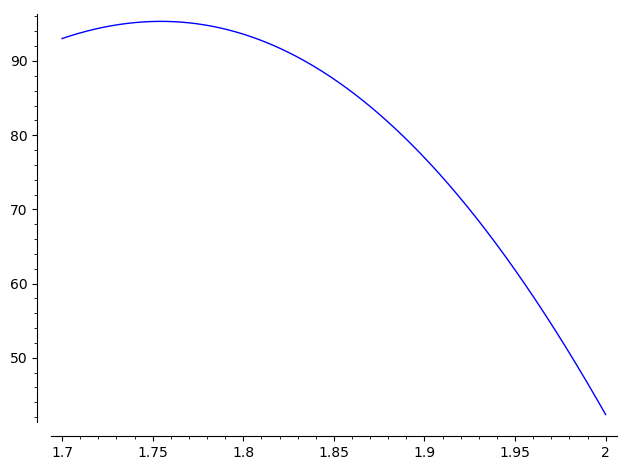

In [2]:
# El mayor de los que NO corten
fx = f.diff(x,1)
fx2 = f.diff(x,2)
fx3 = f.diff(x,3)
plot(fx2,(x,1.7,2))

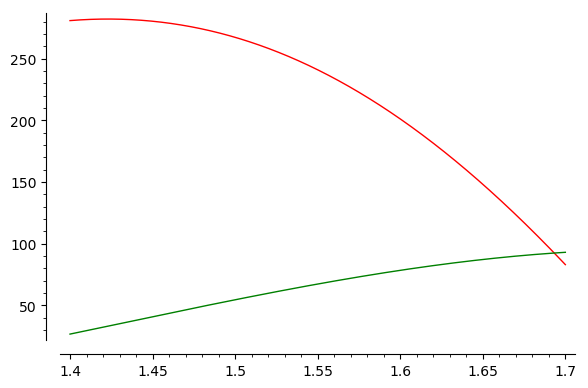

In [52]:
# 2 apartado
# El mayor de los que NO corten
plot(fx3,(x,1.4,1.7), color = 'red') + plot(fx2,(x,1.4,1.7), color = 'green')

#No se verifica en [1,2], se verifica en [1.5,2], x0=2      Corta la tercera solo
#Sí se verifica en [1,2], x0=2
#No se verifica en [1,2], se verifica en [1.1,1.5], x0=1.5  Corta la segunda solo
#No se verifica en [1,2], se verifica en [1.4,1.7], x0=1.7  No cortan a X, se cortan a ellas  THIS

In [3]:
# 3 apartado
# Considerando el intervalo del apartado anterior, dar la cota inferior de minx∈[a,b]|f(2)(x)| para
# estimar el error cometido, redondeando a una cifra decimal, por ejemplo si minx∈[a,b]|f(2)(x)|≥7.888
# la cota sería 7.8
# 1.5 pq es el mayor intervalo seleccionado en el apartado anterior!!!!!!!
minder2=fx2(x=1.4)
show(minder2)

# minx∈[a,b]|f(2)(x)|≤141.6
#. minx∈[a,b]|f(2)(x)|≤58.6
# minx∈[a,b]|f(2)(x)|≤26.6  THIS
# minx∈[a,b]|f(2)(x)|≤24

26.6968212805495

In [5]:
# 4 apartado
# Si aplicamos la regla de Fourier al intervalo del apartado 2, y la cota de la segunda derivada del
# apartado 3, ¿Cuántas iteraciones necesitamos para tener 4 cifras decimales exactas?
# f(a)*f(b) < 0
# f'(x) != 0
# f''(x) != 0
# Añadir en error el número de CDE. AÑADIR EN fx((x=2)) el PUNTO X0.
# 4 cifras decimales:
error=10^(-4)
i=1.0;x0=2.0;eps=abs(fx(x=1.7))/minder2;
while eps>=error:
    x0=x0-fx(x=x0)/fx2(x=x0);
    eps=abs(fx(x=x0))/minder2;
    print('iter',i,'; x0=', x0.n(),'; error=', eps.n())
    i=i+1;

#Al menos 3 iteraciones THIS
#Al menos 7 iteraciones
#Al menos 5 iteraciones
#Al menos 2 iteraciones

iter 1.00000000000000 ; x0= 1.28425131915623 ; error= 0.548861643121578
iter 2.00000000000000 ; x0= -2.37046231803932 ; error= 0.00429280394997983
iter 3.00000000000000 ; x0= -2.28598600178062 ; error= 0.000562903549310916
iter 4.00000000000000 ; x0= -2.29487396341877 ; error= 4.72272120618239e-6


In [4]:
# 5 apartado
# 3 cifras decimales:
error=10^(-3)
i=1.0;x0=2.0;eps=abs(fx(x=1.7))/minder2;
while eps>=error:
    x0=x0-fx(x=x0)/fx2(x=x0);
    eps=abs(fx(x=x0))/minder2;
    print('iter',i,'; x0=', x0.n(),'; error=', eps.n())
    i=i+1;
    
# 1.75054221135860 	2. 1.23934752117171
# 3. 1.63204877393569 	4. Ninguna de las otras respuestas.      

iter 1.00000000000000 ; x0= 1.28425131915623 ; error= 0.548861643121578
iter 2.00000000000000 ; x0= -2.37046231803932 ; error= 0.00429280394997983
iter 3.00000000000000 ; x0= -2.28598600178062 ; error= 0.000562903549310916


In [60]:
# 2 Ejercicio
f(x) = -e^(x^2) * cos(4*x)
show(f(x))

-cos(4*x)*e^(x^2)

In [61]:
# 1 apartado
# Si partimos del intervalo [1,2] ¿cuántas iteraciones del método de la sección áurea 
# necesitamos para poder asegurar 8 cifras decimales exactas
error=10^(-8)

In [62]:
a=1.;b=2.;r=(sqrt(5)-1)/2;c=a+(1-r)*(b-a);d=a+r*(b-a);l=b-a;k=1;
while l>=error:
    if f(c)<f(d):
        b=d;d=c;c=a+(1-r)*(b-a);l=b-a;
        print('iter:', k, '; a=',a.n(), '; b=',b.n())
    else:
        a=c;c=d;d=a+r*(b-a);l=b-a;
        print('iter:', k, '; a=',a.n(), '; b=',b.n())
    k=k+1

iter: 1 ; a= 1.38196601125011 ; b= 2.00000000000000
iter: 2 ; a= 1.61803398874989 ; b= 2.00000000000000
iter: 3 ; a= 1.61803398874989 ; b= 1.85410196624968
iter: 4 ; a= 1.70820393249937 ; b= 1.85410196624968
iter: 5 ; a= 1.70820393249937 ; b= 1.79837387624884
iter: 6 ; a= 1.70820393249937 ; b= 1.76393202250021
iter: 7 ; a= 1.72949016875158 ; b= 1.76393202250021
iter: 8 ; a= 1.74264578624800 ; b= 1.76393202250021
iter: 9 ; a= 1.74264578624800 ; b= 1.75580140374443
iter: 10 ; a= 1.74767078498864 ; b= 1.75580140374443
iter: 11 ; a= 1.74767078498864 ; b= 1.75269578372929
iter: 12 ; a= 1.74959016371414 ; b= 1.75269578372929
iter: 13 ; a= 1.74959016371414 ; b= 1.75150954243964
iter: 14 ; a= 1.74959016371414 ; b= 1.75077640500379
iter: 15 ; a= 1.75004326756793 ; b= 1.75077640500379
iter: 16 ; a= 1.75032330115000 ; b= 1.75077640500379
iter: 17 ; a= 1.75032330115000 ; b= 1.75060333473207
iter: 18 ; a= 1.75043026446036 ; b= 1.75060333473207
iter: 19 ; a= 1.75049637142171 ; b= 1.75060333473207
it

KeyboardInterrupt: 

In [ ]:
# 2 apartado
# Si ejecutamos cinco veces el método de la sección aurea, ¿cúal es la sucesión de extremos descartados?
'''
inicial:  a = 1, b = 2;                             A
iter: 1 ; a= 1.38196601125011 ; b= 2.00000000000000 A
iter: 2 ; a= 1.61803398874989 ; b= 2.00000000000000 B
iter: 3 ; a= 1.61803398874989 ; b= 1.85410196624968 A
iter: 4 ; a= 1.70820393249937 ; b= 1.85410196624968 B
iter: 5 ; a= 1.70820393249937 ; b= 1.79837387624884 

1. La sucesión de descartes es: a, a, b, a, b THIS
2. La sucesión de descartes es: b, b, b, a, b
3. La sucesión de descartes es: a, b, a, a, b
4. La sucesión de descartes es: b, b, a, a, b

1. Al menos 29 iteraciones
2. Al menos 39 iteraciones
3. Al menos 34 iteraciones
4. Al menos 24 iteraciones
'''

In [31]:
# 3 apartado
# El extremo inferior de la iteración que nos asegura 3 cifras decimales exactas es:
'''
1. 1.15448175635988 	2. 1.32429329191142
3. 1.75056247838306 	4. Ninguna de las otras respuestas
'''

# 4 cifras decimales
error=10^(-4)

In [32]:
a=1;b=2;r=(sqrt(5)-1)/2;c=a+(1-r)*(b-a);d=a+r*(b-a);l=b-a;k=1;
while l>=error:
    if f(c)<f(d):
        b=d;d=c;c=a+(1-r)*(b-a);l=b-a;
        print('iter:', k, '; a=',a.n(), '; b=',b.n())
    else:
        a=c;c=d;d=a+r*(b-a);l=b-a;
        print('iter:', k, '; a=',a.n(), '; b=',b.n())
    k=k+1

iter: 1 ; a= 1.38196601125011 ; b= 2.00000000000000
iter: 2 ; a= 1.61803398874989 ; b= 2.00000000000000
iter: 3 ; a= 1.61803398874989 ; b= 1.85410196624968
iter: 4 ; a= 1.70820393249937 ; b= 1.85410196624968
iter: 5 ; a= 1.70820393249937 ; b= 1.79837387624884
iter: 6 ; a= 1.70820393249937 ; b= 1.76393202250021
iter: 7 ; a= 1.72949016875158 ; b= 1.76393202250021
iter: 8 ; a= 1.74264578624800 ; b= 1.76393202250021
iter: 9 ; a= 1.74264578624800 ; b= 1.75580140374443
iter: 10 ; a= 1.74767078498864 ; b= 1.75580140374443
iter: 11 ; a= 1.74767078498864 ; b= 1.75269578372929
iter: 12 ; a= 1.74959016371414 ; b= 1.75269578372929
iter: 13 ; a= 1.74959016371414 ; b= 1.75150954243964
iter: 14 ; a= 1.74959016371414 ; b= 1.75077640500379
iter: 15 ; a= 1.75004326756793 ; b= 1.75077640500379
iter: 16 ; a= 1.75032330115000 ; b= 1.75077640500379
iter: 17 ; a= 1.75032330115000 ; b= 1.75060333473207
iter: 18 ; a= 1.75043026446036 ; b= 1.75060333473207
iter: 19 ; a= 1.75049637142171 ; b= 1.75060333473207
it

In [ ]:
'''
El inferior es A, el superior es B
1. 1.15448175635988 	    2. 1.32429329191142
3. 1.75056247838306 THIS 	4. Ninguna de las otras respuestas
'''

In [ ]:
# 3 Ejercicio

In [56]:
# 1 apartado
f(x) = 3*x^4 - 2*e^x
show(f(x))

3*x^4 - 2*e^x

In [58]:
# Si partimos de valores iniciales x1=0,x2=1 ¿cuántas iteraciones del método de interpolación cúbica 
# necesitamos para poder asegurar |xˆk−xˆk−1|<10−5?  
fx=f.diff()

# N cifras decimales:
error=10^(-3)
x1=0.;x2=1.;f1=f(x1);f2=f(x2);fp1=fx(x1);fp2=fx(x2); xk=10^(99);k=1;
z=3*(f1-f2)/(x2-x1)+fp1+fp2;w=sqrt(z^2-fp1*fp2);
x3=x2-(fp2+w-z)/(fp2-fp1+2*w)*(x2-x1);f3=f(x3);fp3=fx(x3);
l = abs(xk-x3).n()
k = k+1;
print("iteracion:1; abs(xk-x3)=",l,"; fp3(n):", fp3.n());
while l>=error:
    if (fp3.n()>0):
        print("descarto x2");
        xk=x3;x2=x3;f2=f3;fp2=fp3;
        z=3*(f1-f2)/(x2-x1)+fp1+fp2;w=sqrt(z^2-fp1*fp2);
        x3=x2-(fp2+w-z)/(fp2-fp1+2*w)*(x2-x1);f3=f(x3);fp3=fx(x3);
        l = abs(xk-x3).n();
        print("iteracion:",k,"; abs(xk-x3)=",l,"; fp3(n):", fp3.n());
        k=k+1;
    else:
        print("descarto x1");
        xk=x3;x1=x3;f1=f3;fp1=fp3;
        z=3*(f1-f2)/(x2-x1)+fp1+fp2;w=sqrt(z^2-fp1*fp2);
        x3=x2-(fp2+w-z)/(fp2-fp1+2*w)*(x2-x1);f3=f(x3);fp3=fx(x3);
        l = abs(xk-x3).n();
        print("iteracion:",k,"; abs(xk-x3)=",l,"; fp3(n):", fp3.n());
        k=k+1;

print(x3.n());

iteracion:1; abs(xk-x3)= 1.00000000000000e99 ; fp3(n): -0.412750932978023
descarto x1
iteracion: 2 ; abs(xk-x3)= 0.0340333065867683 ; fp3(n): 0.0158657051454361
descarto x2
iteracion: 3 ; abs(xk-x3)= 0.00119017898483720 ; fp3(n): -7.01641812383968e-6
descarto x1
iteracion: 4 ; abs(xk-x3)= 5.27190562316093e-7 ; fp3(n): 4.22595292093320e-12
0.693425633499288


In [ ]:
# 1 apartado
# Error de 5:
'''
1. Al menos 6 iteraciones
2. Al menos 4 iteraciones THIS
3. Al menos 5 iteraciones
4. Al menos 3 iteraciones
'''

# 2 apartado
# Si ejecutamos cinco veces el método de interpolación cúbica, ¿cúal es la sucesión de extremos descartados?
'''
1. La sucesión de descartes es: x2,x1,x2,x1,x2
2. La sucesión de descartes es: x2,x2,x2,x2,x2
3. La sucesión de descartes es: x2,x2,x1,x2,x1
4. La sucesión de descartes es: x1,x2,x1,x2,x1 THIS
'''

# 3 apartado
# El mínimo de la cúbica interpoladora de la iteración que nos asegura 3 cifras decimales exactas es:
'''
1. 0.204481432114767 	2. 0.831031452108246
3. 0.144420998212035 	4. Ninguna de las otras respuestas. THIS
'''

In [ ]:
# Algoritmo para la interpolacion cuadratica:
error=10^(-4); k=1
x1=0.;x2=0.5;x3=1.;f1=f(x1);f2=f(x2);f3=f(x3)
x4=1/2*((x2^2-x3^2)*f1+(x3^2-x1^2)*f2+(x1^2-x2^2)*f3)/((x2-x3)*f1+(x3-x1)*f2+(x1-x2)*f3);f4=f(x4)
l = abs(x4-x1).n()
print("iteracion:",k,"; abs(xK-x4)=",l,"; x4:", x4.n());
k = k+1;
while l>=error:
    if ((f4.n()<f2.n()) and (f4.n()<f3.n())):
        print("descarto x1");
        xk=x4;x1=x2;x2=x4;f1=f2;f2=f4;
        x4=1/2*((x2^2-x3^2)*f1+(x3^2-x1^2)*f2+(x1^2-x2^2)*f3)/((x2-x3)*f1+(x3-x1)*f2+(x1-x2)*f3);f4=f(x4)
        l = abs(xk-x4).n();
        print("iteracion:",k,"; abs(xK-x4)=",l,"; x4:", x4.n());
        k=k+1;
    else:
        print("descarto x3");
        x3=x2;x2=x4;xk=x4;f3=f2;f2=f4
        x4=1/2*((x2^2-x3^2)*f1+(x3^2-x1^2)*f2+(x1^2-x2^2)*f3)/((x2-x3)*f1+(x3-x1)*f2+(x1-x2)*f3);f4=f(x4)
        l = abs(xk-x4).n();
        print("iteracion:",k,"; abs(xk-x4)=",l,"; x4:", x4.n());
        k=k+1;